In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
import numpy as np



import keras


In [46]:
data = web.get_data_yahoo('FB',start = "2010-01-01",
                            end = "2022-02-13")

train = web.get_data_yahoo("FB",
                            start = "2010-01-01",
                            end = "2022-01-14")

test = web.get_data_yahoo("FB",
                            start = "2022-01-14",
                            end = "2022-02-13")



train.shape

(2432, 6)

In [47]:
train_arr = np.array(train.Close).reshape(-1,1)
train_arr.shape

(2432, 1)

In [48]:
normalizer = MinMaxScaler((0,1))
normalized_train = normalizer.fit_transform(train)

In [49]:
inputs = list()
targets = list()

lr_days = 60
train_len = train_arr.shape[0]

for day in range(lr_days, train_len):
    
    inputs.append(normalized_train[day-lr_days:day, 0])
    
    targets.append(normalized_train[day, 0])
    
inputs = np.array(inputs)
inputs = np.reshape(inputs, (inputs.shape[0], inputs.shape[1], 1))
targets = np.array(targets)
print(inputs.shape)
print(targets)#5486

(2372, 60, 1)
[0.00909687 0.00857783 0.00603726 ... 0.86898325 0.86696175 0.85903956]


In [50]:
lstm_net = keras.Sequential(
    [
    
    keras.layers.LSTM(50, return_sequences = True, input_shape = (inputs.shape[1], 1)),
    keras.layers.Dropout(0.1),
    keras.layers.LSTM(50, return_sequences = True),
    keras.layers.Dropout(0.1),
    keras.layers.LSTM(50, return_sequences = True),
    keras.layers.Dropout(0.1),
    keras.layers.LSTM(50, return_sequences = True),
    keras.layers.Dropout(0.1),
    keras.layers.LSTM(50, return_sequences = True),
    keras.layers.Dropout(0.1),
    keras.layers.LSTM(50, return_sequences = True),
    keras.layers.Dropout(0.1),
    keras.layers.LSTM(50, return_sequences = True),
    keras.layers.Dropout(0.1),


    keras.layers.LSTM(50),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(units=1)

    ]
)

In [51]:
inputs.shape[1]

60

In [25]:
lstm_net.compile(
    optimizer = 'adam', 
    metrics = ['accuracy'],
    loss = 'mean_squared_error')

In [38]:
lstm_net.fit(inputs, targets, epochs = 150, batch_size = 32)

Epoch 1/150
75/75 [==============================] - 3s 38ms/step - loss: 3.1560e-04 - accuracy: 8.4317e-04
Epoch 2/150
75/75 [==============================] - 3s 34ms/step - loss: 4.0669e-04 - accuracy: 8.4317e-04
Epoch 3/150
75/75 [==============================] - 5s 72ms/step - loss: 3.4739e-04 - accuracy: 8.4317e-04
Epoch 4/150
75/75 [==============================] - 7s 92ms/step - loss: 2.9261e-04 - accuracy: 8.4317e-04
Epoch 5/150
75/75 [==============================] - 8s 97ms/step - loss: 3.1571e-04 - accuracy: 8.4317e-04
Epoch 6/150
75/75 [==============================] - 9s 118ms/step - loss: 3.5063e-04 - accuracy: 8.4317e-04
Epoch 7/150
75/75 [==============================] - 7s 100ms/step - loss: 3.0146e-04 - accuracy: 8.4317e-04
Epoch 8/150
75/75 [==============================] - 7s 95ms/step - loss: 3.2161e-04 - accuracy: 8.4317e-04
Epoch 9/150
75/75 [==============================] - 8s 110ms/step - loss: 3.3640e-04 - accuracy: 8.4317e-04
Epoch 10/150
75/75 [=====

75/75 [==============================] - 13s 178ms/step - loss: 3.0470e-04 - accuracy: 8.4317e-04
Epoch 76/150
75/75 [==============================] - 14s 184ms/step - loss: 2.9425e-04 - accuracy: 8.4317e-04
Epoch 77/150
75/75 [==============================] - 17s 228ms/step - loss: 3.2408e-04 - accuracy: 8.4317e-04
Epoch 78/150
75/75 [==============================] - 17s 235ms/step - loss: 2.9830e-04 - accuracy: 8.4317e-04
Epoch 79/150
75/75 [==============================] - 14s 193ms/step - loss: 3.1276e-04 - accuracy: 8.4317e-04
Epoch 80/150
75/75 [==============================] - 11s 141ms/step - loss: 3.4106e-04 - accuracy: 8.4317e-04
Epoch 81/150
75/75 [==============================] - 10s 137ms/step - loss: 3.0421e-04 - accuracy: 8.4317e-04
Epoch 82/150
75/75 [==============================] - 13s 181ms/step - loss: 3.5150e-04 - accuracy: 8.4317e-04
Epoch 83/150
75/75 [==============================] - 17s 232ms/step - loss: 3.7196e-04 - accuracy: 8.4317e-04
Epoch 84/150
7

75/75 [==============================] - 17s 227ms/step - loss: 2.9493e-04 - accuracy: 8.4317e-04
Epoch 149/150
75/75 [==============================] - 10s 134ms/step - loss: 3.3803e-04 - accuracy: 8.4317e-04
Epoch 150/150
75/75 [==============================] - 16s 211ms/step - loss: 3.1478e-04 - accuracy: 8.4317e-04


In [57]:
print(lstm_net.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 60, 50)            10400     
                                                                 
 dropout_24 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_25 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_25 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_26 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_26 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_27 (LSTM)              (None, 60, 50)           

In [58]:
test_targets = np.array(test.Close).reshape(-1,1)
test_targets.shape


(20, 1)

In [59]:


days_all = data.shape[0]
days_test = test.shape[0]

days_rem = days_all-lr_days-days_test
test_x = normalizer.fit_transform(np.array(data.Close[days_rem:]).reshape(-1,1))

last_day = lr_days + days_test
test_i = list()
for day in range(lr_days, last_day):
    
    test_i.append(test_x[day-lr_days:day, 0])
    
test_i = np.array(test_i)

preds = normalizer.inverse_transform(lstm_net.predict(test_i))




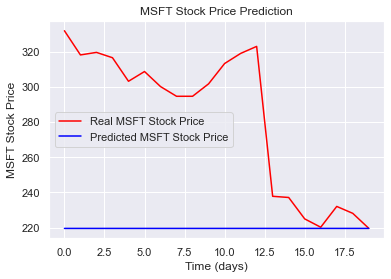

In [60]:
plt.plot(test_targets, color = 'red', label = 'Real MSFT Stock Price')
plt.plot(preds, color = 'blue', label = 'Predicted MSFT Stock Price')
plt.title('MSFT Stock Price Prediction')
plt.xlabel('Time (days)')
plt.ylabel('MSFT Stock Price')
plt.legend()
plt.show()

Text(0, 0.5, 'Close Price (USD)')

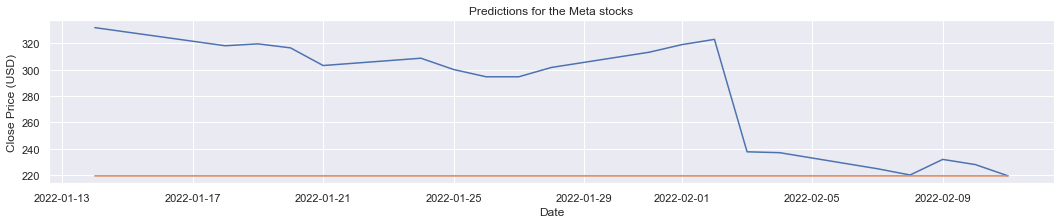

In [61]:
sns.set()
plt.figure(figsize = (18,3))

sns.lineplot(x=test.index,y=test['Close'])
sns.lineplot(x=test.index,y=np.squeeze(preds)).set(title='Predictions for the Meta stocks')

plt.ylabel("Close Price (USD)")

In [62]:
# testing the code using other datasets